In [2]:
%matplotlib notebook
from pySMI.smi_libs import *

plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams.update({ 'image.origin': 'lower'   })
plt.rcParams.update({ 'image.interpolation': 'none'   })
import pickle as cpk
from os import listdir
from os.path import isfile, join

import numpy as np
import sys, os, PIL
import matplotlib.pyplot as plt

from scipy.signal import savgol_filter as sf
from pySMI.smi_generic_functions import plot1D, show_img, create_ring_mask
from pySMI.DataGonio import CalibrationGonio, Mask

from pySMI.Stitching import (get_base_all_filenames, get_phi, 
                             get_qmap_range,Correct_Overlap_Images_Intensities,check_overlap_scaling_factor,
                             stitch_WAXS_in_Qspace,
                            )


In [6]:
beam_x = 97.0
beam_y = 1316.0   #1475 - 159

#energy = 2.484 #keV
#start_angle = 4.5
#phi_spacing= 4.0


In [20]:
wavelength_A =12.39842/energy
sam_det = 0.275 #in meters
dq = 4*np.pi/wavelength_A  * (172/1e6/sam_det)

calibration = CalibrationGonio(wavelength_A= wavelength_A) # 20.0 keV
calibration.set_image_size(195, height=1475) # Pilatus300kW vertical
#calibration.set_image_size(1475, height=195) # Pilatus300kW horizontal
calibration.set_pixel_size(pixel_size_um=172.0)
calibration.set_beam_position(beam_x,  beam_y )
calibration.set_distance( sam_det )
calibration.set_angles(det_phi_g=0., det_theta_g=0., )
print('ratio Dw = {:.3f}'.format(calibration.get_ratioDw()))
mask_dir = '/GPFS/xf12id1/analysis/commissioning/masks/'
#fp = 'dark_dark_000000_SAXS.npy'
fp = 'Pilatus300kWh_main_gaps-mask.png'
mask = Mask(mask_dir+  fp )
#mask.load('./Pilatus300kWh_current-mask.png')
#mask.load(mask_dir+ fp)
mask.data = np.load(  mask_dir+  'dark_dark_000000_SAXS.npy' )


ratio Dw = 8.199


In [21]:
#show_img( mask.data, logs=True )
#d = np.array(  PIL.Image.open( mask_dir+  fp    ).convert('I') )
#np.save(  mask_dir+  'dark_dark_000000_SAXS', d )

# Define Cycle &proposal_id here

In [22]:
CYCLE='2017_3'
proposal_id =  '302179'

In [23]:
inDir = '/data/1M/images/users/%s/'%proposal_id

In [28]:
fp = get_base_all_filenames(inDir,base_filename_cut_length=-16 )
print('We found %s samples in %s folder.' %(len( list( fp.keys() ) ), inDir ) )

We found 135 samples in /data/1M/images/users/302179/ folder.


# Create ResDir Here

In [29]:
ResDir0 = os.path.join('/analysis/', CYCLE,proposal_id, 'Results/')
os.makedirs(ResDir0, exist_ok=True)
print('Results from this analysis will be stashed in the directory %s' % ResDir0)

Results from this analysis will be stashed in the directory /analysis/2017_3/302179/Results/


In [30]:
for k in list(fp.keys()):
    print(k)

test_test
dark_dark
Zn_SEPDM10um_50eV_1
Zn_SEPDM10um_50eV
ZnSEPDM400_2498eV
ZnSEPDM400_2484eV
ZnSEPDM400_2470eV
ZnSEPDM300_2498eV
ZnSEPDM300_2484eV
ZnSEPDM300_2470eV
ZnSEPDM200_2498eV
ZnSEPDM200_2484eV
ZnSEPDM200_2470eV
ZnSEPDM100_2498eV
ZnSEPDM100_2484eV
ZnSEPDM100_2470eV
Zn-SEPDM40um_test
Zn-SEPDM40um_50eV_1
Zn-SEPDM40um_50eV
Zn-SEPDM40um_20eV
Zn-SEPDM20um_50eV
Zn-SEPDM20um_20eV
SSEBS40um_50eV
SSEBS40um_2484p5_2
SSEBS40um_2484p5_1
SSEBS40um_2484p5
SSEBS40um_20eV
SSEBS400_2484p5eV
SSEBS400_2470eV
SSEBS300far_2498eV
SSEBS300far_2484p5eV
SSEBS300far_2470eV
SSEBS300_2498eV
SSEBS300_2484p5eV
SSEBS300_2470eV
SSEBS200far_2498eV
SSEBS200far_2484p5eV
SSEBS200far_2470eV
SSEBS200_2498eV
SSEBS200_2484p5eV
SSEBS200_2470eV
SSEBS100test_2470eV
SSEBS100far_2498eV
SSEBS100far_2484p5eV
SSEBS100far_2470eV
SSEBS100_beamdamage
SSEBS100_2498eV
SSEBS100_2484p5eV
SSEBS100_2470eV
PISM_test
PISM_CS3_24h1
PISM_CS3_24h
NaSEPDM40um_50eV
NaSEPDM40um_2490eV
NaSEPDM40um_2484eV_4
NaSEPDM40um_2484eV_3
NaSEPDM40um_248

In [31]:
#%run ~/pySMI/pySMI/Stitching.py

In [54]:
ResDir

'/analysis/2017_3/302179/Results/10ZnST-ZnSEPDM40um_2470eV/'

In [60]:
#d = np.array(  PIL.Image.open( '/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_2470eV_000008_SAXS.tif'   ).convert('I') )
#np.save(  mask_dir+  'dark_dark_000000_SAXS', d )

#dimg = PIL.Image.fromarray(d)
#dimg.save( ResDir0 + 'test.tif' )

In [67]:
def save_to_tiff( fp, ResDir ):
    d = np.array(  PIL.Image.open( fp    ).convert('I') )
    img = PIL.Image.fromarray(d)
    outp = ResDir + inf.split('/')[-1][:-4] + '_s.tif'
    img.save(  outp )   
    print( 'The data: %s is save to: %s.'%(fp, outp ))
    
 

In [68]:
save_to_tiff( inf, ResDir0 )

The data: /data/1M/images/users/302179/10ZnST-ZnSEPDM40um_2470eV_000010_SAXS.tif is save to: /analysis/2017_3/302179/Results/10ZnST-ZnSEPDM40um_2470eV_000010_SAXS_s.tif.


In [62]:
inf

'/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_2470eV_000010_SAXS.tif'

In [64]:
inf[:-4] + '_s.tif'

'/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_2470eV_000010_SAXS_c.tif'

# Select a interested data set here

In [32]:
k = '10ZnST-ZnSEPDM40um_2470eV'

In [33]:
k

'10ZnST-ZnSEPDM40um_2470eV'

In [35]:
ResDir = os.path.join( ResDir0, k +'/' )
os.makedirs(ResDir, exist_ok=True)
print('Results from this analysis will be stashed in the directory %s' % ResDir)


Results from this analysis will be stashed in the directory /analysis/2017_3/302179/Results/10ZnST-ZnSEPDM40um_2470eV/


In [39]:
%run ~/pySMI/pySMI/Stitching.py

In [41]:
infiles = sorted( fp[k] )  #[:-1]
#phis = np.array( [get_phi(infile, phi_offset= 0, phi_start=4.5, phi_spacing= 4.0, 
#                          ext='_SAXS.tif') for infile in infiles]     )
#print('The rotated angles are: %s.'%phis)

In [71]:
k

'10ZnST-ZnSEPDM40um_20eV'

In [72]:
inf

'/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_2470eV_000010_SAXS.tif'

In [70]:
#infiles

# Check data and convert

In [73]:
for k in list(fp.keys()):
    infiles = sorted( fp[k] )
    energy_scan_pat = [ '20eV','50eV','PISM_CS3_24h','PISM_CS3_24h1','5ZnST-ZnSEPDM40um_test',
                      '10ZnST-ZnSEPDM40um_test', ]
    ResDir = os.path.join( ResDir0, k +'/' )
    os.makedirs(ResDir, exist_ok=True)
    print('Results from this analysis will be stashed in the directory %s' % ResDir)
    flag = 1
    print(k)
    for esp in energy_scan_pat:
        if esp in k:
             
            print('This is a ernergy scan. It will save each individual frame to a tif file.')
            print('Processing...')
            for inf in infiles:        
                print(inf)
                save_to_tiff( inf, ResDir )
            flag = 0
    else:  
        if flag:
            print('We will do average for all of these %s files and save to a tif file.'%len(fp[k]))   
            print('Processing...')
            i = 0
            for inf in infiles:        
                print(inf)
                d = np.array(  PIL.Image.open( inf    ).convert('I') )
                if i==0:                
                    avg = np.zeros(d.shape, dtype=np.float)
                avg += d
                i += 1
            avg /= i        
            img = PIL.Image.fromarray( avg )
            outp = ResDir + k + '_c.tif'
            img.save(  outp )   
            print( 'The data: %s is save to: %s.'%(k, outp ))
        
            
             

Results from this analysis will be stashed in the directory /analysis/2017_3/302179/Results/test_test/
test_test
We will do average for all of these 29 files and save to a tif file.
Processing...
/data/1M/images/users/302179/test_test_000000_SAXS.tif
/data/1M/images/users/302179/test_test_000001_SAXS.tif
/data/1M/images/users/302179/test_test_000002_SAXS.tif
/data/1M/images/users/302179/test_test_000003_SAXS.tif
/data/1M/images/users/302179/test_test_000004_SAXS.tif
/data/1M/images/users/302179/test_test_000005_SAXS.tif
/data/1M/images/users/302179/test_test_000006_SAXS.tif
/data/1M/images/users/302179/test_test_000007_SAXS.tif
/data/1M/images/users/302179/test_test_000008_SAXS.tif
/data/1M/images/users/302179/test_test_000009_SAXS.tif
/data/1M/images/users/302179/test_test_000010_SAXS.tif
/data/1M/images/users/302179/test_test_000011_SAXS.tif
/data/1M/images/users/302179/test_test_000012_SAXS.tif
/data/1M/images/users/302179/test_test_000013_SAXS.tif
/data/1M/images/users/302179/test_

The data: /data/1M/images/users/302179/Zn_SEPDM10um_50eV_1_000024_SAXS.tif is save to: /analysis/2017_3/302179/Results/Zn_SEPDM10um_50eV_1/Zn_SEPDM10um_50eV_1_000024_SAXS_s.tif.
/data/1M/images/users/302179/Zn_SEPDM10um_50eV_1_000025_SAXS.tif
The data: /data/1M/images/users/302179/Zn_SEPDM10um_50eV_1_000025_SAXS.tif is save to: /analysis/2017_3/302179/Results/Zn_SEPDM10um_50eV_1/Zn_SEPDM10um_50eV_1_000025_SAXS_s.tif.
/data/1M/images/users/302179/Zn_SEPDM10um_50eV_1_000026_SAXS.tif
The data: /data/1M/images/users/302179/Zn_SEPDM10um_50eV_1_000026_SAXS.tif is save to: /analysis/2017_3/302179/Results/Zn_SEPDM10um_50eV_1/Zn_SEPDM10um_50eV_1_000026_SAXS_s.tif.
/data/1M/images/users/302179/Zn_SEPDM10um_50eV_1_000027_SAXS.tif
The data: /data/1M/images/users/302179/Zn_SEPDM10um_50eV_1_000027_SAXS.tif is save to: /analysis/2017_3/302179/Results/Zn_SEPDM10um_50eV_1/Zn_SEPDM10um_50eV_1_000027_SAXS_s.tif.
/data/1M/images/users/302179/Zn_SEPDM10um_50eV_1_000028_SAXS.tif
The data: /data/1M/images/us

/data/1M/images/users/302179/Zn_SEPDM10um_50eV_1_000031_SAXS.tif
/data/1M/images/users/302179/Zn_SEPDM10um_50eV_1_000032_SAXS.tif
/data/1M/images/users/302179/Zn_SEPDM10um_50eV_1_000033_SAXS.tif
/data/1M/images/users/302179/Zn_SEPDM10um_50eV_1_000034_SAXS.tif
/data/1M/images/users/302179/Zn_SEPDM10um_50eV_1_000035_SAXS.tif
/data/1M/images/users/302179/Zn_SEPDM10um_50eV_1_000036_SAXS.tif
/data/1M/images/users/302179/Zn_SEPDM10um_50eV_1_000037_SAXS.tif
/data/1M/images/users/302179/Zn_SEPDM10um_50eV_1_000038_SAXS.tif
/data/1M/images/users/302179/Zn_SEPDM10um_50eV_1_000039_SAXS.tif
/data/1M/images/users/302179/Zn_SEPDM10um_50eV_1_000040_SAXS.tif
/data/1M/images/users/302179/Zn_SEPDM10um_50eV_1_000041_SAXS.tif
/data/1M/images/users/302179/Zn_SEPDM10um_50eV_1_000042_SAXS.tif
/data/1M/images/users/302179/Zn_SEPDM10um_50eV_1_000043_SAXS.tif
/data/1M/images/users/302179/Zn_SEPDM10um_50eV_1_000044_SAXS.tif
/data/1M/images/users/302179/Zn_SEPDM10um_50eV_1_000045_SAXS.tif
/data/1M/images/users/302

The data: /data/1M/images/users/302179/Zn_SEPDM10um_50eV_000028_SAXS.tif is save to: /analysis/2017_3/302179/Results/Zn_SEPDM10um_50eV/Zn_SEPDM10um_50eV_000028_SAXS_s.tif.
/data/1M/images/users/302179/Zn_SEPDM10um_50eV_000029_SAXS.tif
The data: /data/1M/images/users/302179/Zn_SEPDM10um_50eV_000029_SAXS.tif is save to: /analysis/2017_3/302179/Results/Zn_SEPDM10um_50eV/Zn_SEPDM10um_50eV_000029_SAXS_s.tif.
/data/1M/images/users/302179/Zn_SEPDM10um_50eV_000030_SAXS.tif
The data: /data/1M/images/users/302179/Zn_SEPDM10um_50eV_000030_SAXS.tif is save to: /analysis/2017_3/302179/Results/Zn_SEPDM10um_50eV/Zn_SEPDM10um_50eV_000030_SAXS_s.tif.
/data/1M/images/users/302179/Zn_SEPDM10um_50eV_000031_SAXS.tif
The data: /data/1M/images/users/302179/Zn_SEPDM10um_50eV_000031_SAXS.tif is save to: /analysis/2017_3/302179/Results/Zn_SEPDM10um_50eV/Zn_SEPDM10um_50eV_000031_SAXS_s.tif.
/data/1M/images/users/302179/Zn_SEPDM10um_50eV_000032_SAXS.tif
The data: /data/1M/images/users/302179/Zn_SEPDM10um_50eV_000

/data/1M/images/users/302179/Zn_SEPDM10um_50eV_000050_SAXS.tif
The data: Zn_SEPDM10um_50eV is save to: /analysis/2017_3/302179/Results/Zn_SEPDM10um_50eV/Zn_SEPDM10um_50eV_c.tif.
Results from this analysis will be stashed in the directory /analysis/2017_3/302179/Results/ZnSEPDM400_2498eV/
ZnSEPDM400_2498eV
We will do average for all of these 22 files and save to a tif file.
Processing...
/data/1M/images/users/302179/ZnSEPDM400_2498eV_000000_SAXS.tif
/data/1M/images/users/302179/ZnSEPDM400_2498eV_000001_SAXS.tif
/data/1M/images/users/302179/ZnSEPDM400_2498eV_000002_SAXS.tif
/data/1M/images/users/302179/ZnSEPDM400_2498eV_000003_SAXS.tif
/data/1M/images/users/302179/ZnSEPDM400_2498eV_000004_SAXS.tif
/data/1M/images/users/302179/ZnSEPDM400_2498eV_000005_SAXS.tif
/data/1M/images/users/302179/ZnSEPDM400_2498eV_000006_SAXS.tif
/data/1M/images/users/302179/ZnSEPDM400_2498eV_000007_SAXS.tif
/data/1M/images/users/302179/ZnSEPDM400_2498eV_000008_SAXS.tif
/data/1M/images/users/302179/ZnSEPDM400_249

/data/1M/images/users/302179/ZnSEPDM200_2498eV_000005_SAXS.tif
/data/1M/images/users/302179/ZnSEPDM200_2498eV_000006_SAXS.tif
/data/1M/images/users/302179/ZnSEPDM200_2498eV_000007_SAXS.tif
/data/1M/images/users/302179/ZnSEPDM200_2498eV_000008_SAXS.tif
/data/1M/images/users/302179/ZnSEPDM200_2498eV_000009_SAXS.tif
/data/1M/images/users/302179/ZnSEPDM200_2498eV_000010_SAXS.tif
The data: ZnSEPDM200_2498eV is save to: /analysis/2017_3/302179/Results/ZnSEPDM200_2498eV/ZnSEPDM200_2498eV_c.tif.
Results from this analysis will be stashed in the directory /analysis/2017_3/302179/Results/ZnSEPDM200_2484eV/
ZnSEPDM200_2484eV
We will do average for all of these 13 files and save to a tif file.
Processing...
/data/1M/images/users/302179/ZnSEPDM200_2484eV_000000_SAXS.tif
/data/1M/images/users/302179/ZnSEPDM200_2484eV_000001_SAXS.tif
/data/1M/images/users/302179/ZnSEPDM200_2484eV_000002_SAXS.tif
/data/1M/images/users/302179/ZnSEPDM200_2484eV_000003_SAXS.tif
/data/1M/images/users/302179/ZnSEPDM200_248

The data: /data/1M/images/users/302179/Zn-SEPDM40um_50eV_1_000004_SAXS.tif is save to: /analysis/2017_3/302179/Results/Zn-SEPDM40um_50eV_1/Zn-SEPDM40um_50eV_1_000004_SAXS_s.tif.
/data/1M/images/users/302179/Zn-SEPDM40um_50eV_1_000005_SAXS.tif
The data: /data/1M/images/users/302179/Zn-SEPDM40um_50eV_1_000005_SAXS.tif is save to: /analysis/2017_3/302179/Results/Zn-SEPDM40um_50eV_1/Zn-SEPDM40um_50eV_1_000005_SAXS_s.tif.
/data/1M/images/users/302179/Zn-SEPDM40um_50eV_1_000006_SAXS.tif
The data: /data/1M/images/users/302179/Zn-SEPDM40um_50eV_1_000006_SAXS.tif is save to: /analysis/2017_3/302179/Results/Zn-SEPDM40um_50eV_1/Zn-SEPDM40um_50eV_1_000006_SAXS_s.tif.
/data/1M/images/users/302179/Zn-SEPDM40um_50eV_1_000007_SAXS.tif
The data: /data/1M/images/users/302179/Zn-SEPDM40um_50eV_1_000007_SAXS.tif is save to: /analysis/2017_3/302179/Results/Zn-SEPDM40um_50eV_1/Zn-SEPDM40um_50eV_1_000007_SAXS_s.tif.
/data/1M/images/users/302179/Zn-SEPDM40um_50eV_1_000008_SAXS.tif
The data: /data/1M/images/us

The data: /data/1M/images/users/302179/Zn-SEPDM40um_50eV_1_000038_SAXS.tif is save to: /analysis/2017_3/302179/Results/Zn-SEPDM40um_50eV_1/Zn-SEPDM40um_50eV_1_000038_SAXS_s.tif.
/data/1M/images/users/302179/Zn-SEPDM40um_50eV_1_000039_SAXS.tif
The data: /data/1M/images/users/302179/Zn-SEPDM40um_50eV_1_000039_SAXS.tif is save to: /analysis/2017_3/302179/Results/Zn-SEPDM40um_50eV_1/Zn-SEPDM40um_50eV_1_000039_SAXS_s.tif.
/data/1M/images/users/302179/Zn-SEPDM40um_50eV_1_000040_SAXS.tif
The data: /data/1M/images/users/302179/Zn-SEPDM40um_50eV_1_000040_SAXS.tif is save to: /analysis/2017_3/302179/Results/Zn-SEPDM40um_50eV_1/Zn-SEPDM40um_50eV_1_000040_SAXS_s.tif.
/data/1M/images/users/302179/Zn-SEPDM40um_50eV_1_000041_SAXS.tif
The data: /data/1M/images/users/302179/Zn-SEPDM40um_50eV_1_000041_SAXS.tif is save to: /analysis/2017_3/302179/Results/Zn-SEPDM40um_50eV_1/Zn-SEPDM40um_50eV_1_000041_SAXS_s.tif.
/data/1M/images/users/302179/Zn-SEPDM40um_50eV_1_000042_SAXS.tif
The data: /data/1M/images/us

The data: /data/1M/images/users/302179/Zn-SEPDM40um_50eV_000006_SAXS.tif is save to: /analysis/2017_3/302179/Results/Zn-SEPDM40um_50eV/Zn-SEPDM40um_50eV_000006_SAXS_s.tif.
/data/1M/images/users/302179/Zn-SEPDM40um_50eV_000007_SAXS.tif
The data: /data/1M/images/users/302179/Zn-SEPDM40um_50eV_000007_SAXS.tif is save to: /analysis/2017_3/302179/Results/Zn-SEPDM40um_50eV/Zn-SEPDM40um_50eV_000007_SAXS_s.tif.
/data/1M/images/users/302179/Zn-SEPDM40um_50eV_000008_SAXS.tif
The data: /data/1M/images/users/302179/Zn-SEPDM40um_50eV_000008_SAXS.tif is save to: /analysis/2017_3/302179/Results/Zn-SEPDM40um_50eV/Zn-SEPDM40um_50eV_000008_SAXS_s.tif.
/data/1M/images/users/302179/Zn-SEPDM40um_50eV_000009_SAXS.tif
The data: /data/1M/images/users/302179/Zn-SEPDM40um_50eV_000009_SAXS.tif is save to: /analysis/2017_3/302179/Results/Zn-SEPDM40um_50eV/Zn-SEPDM40um_50eV_000009_SAXS_s.tif.
/data/1M/images/users/302179/Zn-SEPDM40um_50eV_000010_SAXS.tif
The data: /data/1M/images/users/302179/Zn-SEPDM40um_50eV_000

The data: /data/1M/images/users/302179/Zn-SEPDM40um_50eV_000041_SAXS.tif is save to: /analysis/2017_3/302179/Results/Zn-SEPDM40um_50eV/Zn-SEPDM40um_50eV_000041_SAXS_s.tif.
/data/1M/images/users/302179/Zn-SEPDM40um_50eV_000042_SAXS.tif
The data: /data/1M/images/users/302179/Zn-SEPDM40um_50eV_000042_SAXS.tif is save to: /analysis/2017_3/302179/Results/Zn-SEPDM40um_50eV/Zn-SEPDM40um_50eV_000042_SAXS_s.tif.
/data/1M/images/users/302179/Zn-SEPDM40um_50eV_000043_SAXS.tif
The data: /data/1M/images/users/302179/Zn-SEPDM40um_50eV_000043_SAXS.tif is save to: /analysis/2017_3/302179/Results/Zn-SEPDM40um_50eV/Zn-SEPDM40um_50eV_000043_SAXS_s.tif.
/data/1M/images/users/302179/Zn-SEPDM40um_50eV_000044_SAXS.tif
The data: /data/1M/images/users/302179/Zn-SEPDM40um_50eV_000044_SAXS.tif is save to: /analysis/2017_3/302179/Results/Zn-SEPDM40um_50eV/Zn-SEPDM40um_50eV_000044_SAXS_s.tif.
/data/1M/images/users/302179/Zn-SEPDM40um_50eV_000045_SAXS.tif
The data: /data/1M/images/users/302179/Zn-SEPDM40um_50eV_000

The data: /data/1M/images/users/302179/Zn-SEPDM40um_20eV_000010_SAXS.tif is save to: /analysis/2017_3/302179/Results/Zn-SEPDM40um_20eV/Zn-SEPDM40um_20eV_000010_SAXS_s.tif.
/data/1M/images/users/302179/Zn-SEPDM40um_20eV_000011_SAXS.tif
The data: /data/1M/images/users/302179/Zn-SEPDM40um_20eV_000011_SAXS.tif is save to: /analysis/2017_3/302179/Results/Zn-SEPDM40um_20eV/Zn-SEPDM40um_20eV_000011_SAXS_s.tif.
/data/1M/images/users/302179/Zn-SEPDM40um_20eV_000012_SAXS.tif
The data: /data/1M/images/users/302179/Zn-SEPDM40um_20eV_000012_SAXS.tif is save to: /analysis/2017_3/302179/Results/Zn-SEPDM40um_20eV/Zn-SEPDM40um_20eV_000012_SAXS_s.tif.
/data/1M/images/users/302179/Zn-SEPDM40um_20eV_000013_SAXS.tif
The data: /data/1M/images/users/302179/Zn-SEPDM40um_20eV_000013_SAXS.tif is save to: /analysis/2017_3/302179/Results/Zn-SEPDM40um_20eV/Zn-SEPDM40um_20eV_000013_SAXS_s.tif.
/data/1M/images/users/302179/Zn-SEPDM40um_20eV_000014_SAXS.tif
The data: /data/1M/images/users/302179/Zn-SEPDM40um_20eV_000

/data/1M/images/users/302179/Zn-SEPDM40um_20eV_000016_SAXS.tif
/data/1M/images/users/302179/Zn-SEPDM40um_20eV_000017_SAXS.tif
/data/1M/images/users/302179/Zn-SEPDM40um_20eV_000018_SAXS.tif
/data/1M/images/users/302179/Zn-SEPDM40um_20eV_000019_SAXS.tif
/data/1M/images/users/302179/Zn-SEPDM40um_20eV_000020_SAXS.tif
/data/1M/images/users/302179/Zn-SEPDM40um_20eV_000021_SAXS.tif
/data/1M/images/users/302179/Zn-SEPDM40um_20eV_000022_SAXS.tif
/data/1M/images/users/302179/Zn-SEPDM40um_20eV_000023_SAXS.tif
/data/1M/images/users/302179/Zn-SEPDM40um_20eV_000024_SAXS.tif
/data/1M/images/users/302179/Zn-SEPDM40um_20eV_000025_SAXS.tif
/data/1M/images/users/302179/Zn-SEPDM40um_20eV_000026_SAXS.tif
/data/1M/images/users/302179/Zn-SEPDM40um_20eV_000027_SAXS.tif
/data/1M/images/users/302179/Zn-SEPDM40um_20eV_000028_SAXS.tif
/data/1M/images/users/302179/Zn-SEPDM40um_20eV_000029_SAXS.tif
/data/1M/images/users/302179/Zn-SEPDM40um_20eV_000030_SAXS.tif
/data/1M/images/users/302179/Zn-SEPDM40um_20eV_000031_S

The data: /data/1M/images/users/302179/Zn-SEPDM20um_50eV_000027_SAXS.tif is save to: /analysis/2017_3/302179/Results/Zn-SEPDM20um_50eV/Zn-SEPDM20um_50eV_000027_SAXS_s.tif.
/data/1M/images/users/302179/Zn-SEPDM20um_50eV_000028_SAXS.tif
The data: /data/1M/images/users/302179/Zn-SEPDM20um_50eV_000028_SAXS.tif is save to: /analysis/2017_3/302179/Results/Zn-SEPDM20um_50eV/Zn-SEPDM20um_50eV_000028_SAXS_s.tif.
/data/1M/images/users/302179/Zn-SEPDM20um_50eV_000029_SAXS.tif
The data: /data/1M/images/users/302179/Zn-SEPDM20um_50eV_000029_SAXS.tif is save to: /analysis/2017_3/302179/Results/Zn-SEPDM20um_50eV/Zn-SEPDM20um_50eV_000029_SAXS_s.tif.
/data/1M/images/users/302179/Zn-SEPDM20um_50eV_000030_SAXS.tif
The data: /data/1M/images/users/302179/Zn-SEPDM20um_50eV_000030_SAXS.tif is save to: /analysis/2017_3/302179/Results/Zn-SEPDM20um_50eV/Zn-SEPDM20um_50eV_000030_SAXS_s.tif.
/data/1M/images/users/302179/Zn-SEPDM20um_50eV_000031_SAXS.tif
The data: /data/1M/images/users/302179/Zn-SEPDM20um_50eV_000

/data/1M/images/users/302179/Zn-SEPDM20um_50eV_000043_SAXS.tif
/data/1M/images/users/302179/Zn-SEPDM20um_50eV_000044_SAXS.tif
/data/1M/images/users/302179/Zn-SEPDM20um_50eV_000045_SAXS.tif
/data/1M/images/users/302179/Zn-SEPDM20um_50eV_000046_SAXS.tif
/data/1M/images/users/302179/Zn-SEPDM20um_50eV_000047_SAXS.tif
/data/1M/images/users/302179/Zn-SEPDM20um_50eV_000048_SAXS.tif
/data/1M/images/users/302179/Zn-SEPDM20um_50eV_000049_SAXS.tif
/data/1M/images/users/302179/Zn-SEPDM20um_50eV_000050_SAXS.tif
The data: Zn-SEPDM20um_50eV is save to: /analysis/2017_3/302179/Results/Zn-SEPDM20um_50eV/Zn-SEPDM20um_50eV_c.tif.
Results from this analysis will be stashed in the directory /analysis/2017_3/302179/Results/Zn-SEPDM20um_20eV/
Zn-SEPDM20um_20eV
This is a ernergy scan. It will save each individual frame to a tif file.
Processing...
/data/1M/images/users/302179/Zn-SEPDM20um_20eV_000000_SAXS.tif
The data: /data/1M/images/users/302179/Zn-SEPDM20um_20eV_000000_SAXS.tif is save to: /analysis/2017_3

The data: /data/1M/images/users/302179/Zn-SEPDM20um_20eV_000032_SAXS.tif is save to: /analysis/2017_3/302179/Results/Zn-SEPDM20um_20eV/Zn-SEPDM20um_20eV_000032_SAXS_s.tif.
/data/1M/images/users/302179/Zn-SEPDM20um_20eV_000033_SAXS.tif
The data: /data/1M/images/users/302179/Zn-SEPDM20um_20eV_000033_SAXS.tif is save to: /analysis/2017_3/302179/Results/Zn-SEPDM20um_20eV/Zn-SEPDM20um_20eV_000033_SAXS_s.tif.
/data/1M/images/users/302179/Zn-SEPDM20um_20eV_000034_SAXS.tif
The data: /data/1M/images/users/302179/Zn-SEPDM20um_20eV_000034_SAXS.tif is save to: /analysis/2017_3/302179/Results/Zn-SEPDM20um_20eV/Zn-SEPDM20um_20eV_000034_SAXS_s.tif.
/data/1M/images/users/302179/Zn-SEPDM20um_20eV_000035_SAXS.tif
The data: /data/1M/images/users/302179/Zn-SEPDM20um_20eV_000035_SAXS.tif is save to: /analysis/2017_3/302179/Results/Zn-SEPDM20um_20eV/Zn-SEPDM20um_20eV_000035_SAXS_s.tif.
/data/1M/images/users/302179/Zn-SEPDM20um_20eV_000036_SAXS.tif
The data: /data/1M/images/users/302179/Zn-SEPDM20um_20eV_000

The data: /data/1M/images/users/302179/SSEBS40um_50eV_000014_SAXS.tif is save to: /analysis/2017_3/302179/Results/SSEBS40um_50eV/SSEBS40um_50eV_000014_SAXS_s.tif.
/data/1M/images/users/302179/SSEBS40um_50eV_000015_SAXS.tif
The data: /data/1M/images/users/302179/SSEBS40um_50eV_000015_SAXS.tif is save to: /analysis/2017_3/302179/Results/SSEBS40um_50eV/SSEBS40um_50eV_000015_SAXS_s.tif.
/data/1M/images/users/302179/SSEBS40um_50eV_000016_SAXS.tif
The data: /data/1M/images/users/302179/SSEBS40um_50eV_000016_SAXS.tif is save to: /analysis/2017_3/302179/Results/SSEBS40um_50eV/SSEBS40um_50eV_000016_SAXS_s.tif.
/data/1M/images/users/302179/SSEBS40um_50eV_000017_SAXS.tif
The data: /data/1M/images/users/302179/SSEBS40um_50eV_000017_SAXS.tif is save to: /analysis/2017_3/302179/Results/SSEBS40um_50eV/SSEBS40um_50eV_000017_SAXS_s.tif.
/data/1M/images/users/302179/SSEBS40um_50eV_000018_SAXS.tif
The data: /data/1M/images/users/302179/SSEBS40um_50eV_000018_SAXS.tif is save to: /analysis/2017_3/302179/Re

/data/1M/images/users/302179/SSEBS40um_50eV_000009_SAXS.tif
/data/1M/images/users/302179/SSEBS40um_50eV_000010_SAXS.tif
/data/1M/images/users/302179/SSEBS40um_50eV_000011_SAXS.tif
/data/1M/images/users/302179/SSEBS40um_50eV_000012_SAXS.tif
/data/1M/images/users/302179/SSEBS40um_50eV_000013_SAXS.tif
/data/1M/images/users/302179/SSEBS40um_50eV_000014_SAXS.tif
/data/1M/images/users/302179/SSEBS40um_50eV_000015_SAXS.tif
/data/1M/images/users/302179/SSEBS40um_50eV_000016_SAXS.tif
/data/1M/images/users/302179/SSEBS40um_50eV_000017_SAXS.tif
/data/1M/images/users/302179/SSEBS40um_50eV_000018_SAXS.tif
/data/1M/images/users/302179/SSEBS40um_50eV_000019_SAXS.tif
/data/1M/images/users/302179/SSEBS40um_50eV_000020_SAXS.tif
/data/1M/images/users/302179/SSEBS40um_50eV_000021_SAXS.tif
/data/1M/images/users/302179/SSEBS40um_50eV_000022_SAXS.tif
/data/1M/images/users/302179/SSEBS40um_50eV_000023_SAXS.tif
/data/1M/images/users/302179/SSEBS40um_50eV_000024_SAXS.tif
/data/1M/images/users/302179/SSEBS40um_5

The data: /data/1M/images/users/302179/SSEBS40um_20eV_000017_SAXS.tif is save to: /analysis/2017_3/302179/Results/SSEBS40um_20eV/SSEBS40um_20eV_000017_SAXS_s.tif.
/data/1M/images/users/302179/SSEBS40um_20eV_000018_SAXS.tif
The data: /data/1M/images/users/302179/SSEBS40um_20eV_000018_SAXS.tif is save to: /analysis/2017_3/302179/Results/SSEBS40um_20eV/SSEBS40um_20eV_000018_SAXS_s.tif.
/data/1M/images/users/302179/SSEBS40um_20eV_000019_SAXS.tif
The data: /data/1M/images/users/302179/SSEBS40um_20eV_000019_SAXS.tif is save to: /analysis/2017_3/302179/Results/SSEBS40um_20eV/SSEBS40um_20eV_000019_SAXS_s.tif.
/data/1M/images/users/302179/SSEBS40um_20eV_000020_SAXS.tif
The data: /data/1M/images/users/302179/SSEBS40um_20eV_000020_SAXS.tif is save to: /analysis/2017_3/302179/Results/SSEBS40um_20eV/SSEBS40um_20eV_000020_SAXS_s.tif.
/data/1M/images/users/302179/SSEBS40um_20eV_000021_SAXS.tif
The data: /data/1M/images/users/302179/SSEBS40um_20eV_000021_SAXS.tif is save to: /analysis/2017_3/302179/Re

/data/1M/images/users/302179/SSEBS400_2484p5eV_000001_SAXS.tif
/data/1M/images/users/302179/SSEBS400_2484p5eV_000002_SAXS.tif
/data/1M/images/users/302179/SSEBS400_2484p5eV_000003_SAXS.tif
/data/1M/images/users/302179/SSEBS400_2484p5eV_000004_SAXS.tif
/data/1M/images/users/302179/SSEBS400_2484p5eV_000005_SAXS.tif
/data/1M/images/users/302179/SSEBS400_2484p5eV_000006_SAXS.tif
/data/1M/images/users/302179/SSEBS400_2484p5eV_000007_SAXS.tif
/data/1M/images/users/302179/SSEBS400_2484p5eV_000008_SAXS.tif
/data/1M/images/users/302179/SSEBS400_2484p5eV_000009_SAXS.tif
/data/1M/images/users/302179/SSEBS400_2484p5eV_000010_SAXS.tif
/data/1M/images/users/302179/SSEBS400_2484p5eV_000011_SAXS.tif
/data/1M/images/users/302179/SSEBS400_2484p5eV_000012_SAXS.tif
/data/1M/images/users/302179/SSEBS400_2484p5eV_000013_SAXS.tif
/data/1M/images/users/302179/SSEBS400_2484p5eV_000014_SAXS.tif
The data: SSEBS400_2484p5eV is save to: /analysis/2017_3/302179/Results/SSEBS400_2484p5eV/SSEBS400_2484p5eV_c.tif.
Res

/data/1M/images/users/302179/SSEBS300_2470eV_000002_SAXS.tif
/data/1M/images/users/302179/SSEBS300_2470eV_000003_SAXS.tif
/data/1M/images/users/302179/SSEBS300_2470eV_000004_SAXS.tif
/data/1M/images/users/302179/SSEBS300_2470eV_000005_SAXS.tif
/data/1M/images/users/302179/SSEBS300_2470eV_000006_SAXS.tif
/data/1M/images/users/302179/SSEBS300_2470eV_000007_SAXS.tif
/data/1M/images/users/302179/SSEBS300_2470eV_000008_SAXS.tif
/data/1M/images/users/302179/SSEBS300_2470eV_000009_SAXS.tif
/data/1M/images/users/302179/SSEBS300_2470eV_000010_SAXS.tif
The data: SSEBS300_2470eV is save to: /analysis/2017_3/302179/Results/SSEBS300_2470eV/SSEBS300_2470eV_c.tif.
Results from this analysis will be stashed in the directory /analysis/2017_3/302179/Results/SSEBS200far_2498eV/
SSEBS200far_2498eV
We will do average for all of these 11 files and save to a tif file.
Processing...
/data/1M/images/users/302179/SSEBS200far_2498eV_000000_SAXS.tif
/data/1M/images/users/302179/SSEBS200far_2498eV_000001_SAXS.tif


The data: SSEBS100far_2498eV is save to: /analysis/2017_3/302179/Results/SSEBS100far_2498eV/SSEBS100far_2498eV_c.tif.
Results from this analysis will be stashed in the directory /analysis/2017_3/302179/Results/SSEBS100far_2484p5eV/
SSEBS100far_2484p5eV
We will do average for all of these 11 files and save to a tif file.
Processing...
/data/1M/images/users/302179/SSEBS100far_2484p5eV_000000_SAXS.tif
/data/1M/images/users/302179/SSEBS100far_2484p5eV_000001_SAXS.tif
/data/1M/images/users/302179/SSEBS100far_2484p5eV_000002_SAXS.tif
/data/1M/images/users/302179/SSEBS100far_2484p5eV_000003_SAXS.tif
/data/1M/images/users/302179/SSEBS100far_2484p5eV_000004_SAXS.tif
/data/1M/images/users/302179/SSEBS100far_2484p5eV_000005_SAXS.tif
/data/1M/images/users/302179/SSEBS100far_2484p5eV_000006_SAXS.tif
/data/1M/images/users/302179/SSEBS100far_2484p5eV_000007_SAXS.tif
/data/1M/images/users/302179/SSEBS100far_2484p5eV_000008_SAXS.tif
/data/1M/images/users/302179/SSEBS100far_2484p5eV_000009_SAXS.tif
/dat

/data/1M/images/users/302179/SSEBS100_beamdamage_000089_SAXS.tif
/data/1M/images/users/302179/SSEBS100_beamdamage_000090_SAXS.tif
/data/1M/images/users/302179/SSEBS100_beamdamage_000091_SAXS.tif
/data/1M/images/users/302179/SSEBS100_beamdamage_000092_SAXS.tif
/data/1M/images/users/302179/SSEBS100_beamdamage_000093_SAXS.tif
/data/1M/images/users/302179/SSEBS100_beamdamage_000094_SAXS.tif
/data/1M/images/users/302179/SSEBS100_beamdamage_000095_SAXS.tif
/data/1M/images/users/302179/SSEBS100_beamdamage_000096_SAXS.tif
/data/1M/images/users/302179/SSEBS100_beamdamage_000097_SAXS.tif
/data/1M/images/users/302179/SSEBS100_beamdamage_000098_SAXS.tif
/data/1M/images/users/302179/SSEBS100_beamdamage_000099_SAXS.tif
/data/1M/images/users/302179/SSEBS100_beamdamage_000100_SAXS.tif
The data: SSEBS100_beamdamage is save to: /analysis/2017_3/302179/Results/SSEBS100_beamdamage/SSEBS100_beamdamage_c.tif.
Results from this analysis will be stashed in the directory /analysis/2017_3/302179/Results/SSEBS10

The data: /data/1M/images/users/302179/PISM_CS3_24h1_000012_SAXS.tif is save to: /analysis/2017_3/302179/Results/PISM_CS3_24h1/PISM_CS3_24h1_000012_SAXS_s.tif.
/data/1M/images/users/302179/PISM_CS3_24h1_000013_SAXS.tif
The data: /data/1M/images/users/302179/PISM_CS3_24h1_000013_SAXS.tif is save to: /analysis/2017_3/302179/Results/PISM_CS3_24h1/PISM_CS3_24h1_000013_SAXS_s.tif.
/data/1M/images/users/302179/PISM_CS3_24h1_000014_SAXS.tif
The data: /data/1M/images/users/302179/PISM_CS3_24h1_000014_SAXS.tif is save to: /analysis/2017_3/302179/Results/PISM_CS3_24h1/PISM_CS3_24h1_000014_SAXS_s.tif.
/data/1M/images/users/302179/PISM_CS3_24h1_000015_SAXS.tif
The data: /data/1M/images/users/302179/PISM_CS3_24h1_000015_SAXS.tif is save to: /analysis/2017_3/302179/Results/PISM_CS3_24h1/PISM_CS3_24h1_000015_SAXS_s.tif.
/data/1M/images/users/302179/PISM_CS3_24h1_000016_SAXS.tif
The data: /data/1M/images/users/302179/PISM_CS3_24h1_000016_SAXS.tif is save to: /analysis/2017_3/302179/Results/PISM_CS3_24

The data: /data/1M/images/users/302179/PISM_CS3_24h1_000005_SAXS.tif is save to: /analysis/2017_3/302179/Results/PISM_CS3_24h1/PISM_CS3_24h1_000005_SAXS_s.tif.
/data/1M/images/users/302179/PISM_CS3_24h1_000006_SAXS.tif
The data: /data/1M/images/users/302179/PISM_CS3_24h1_000006_SAXS.tif is save to: /analysis/2017_3/302179/Results/PISM_CS3_24h1/PISM_CS3_24h1_000006_SAXS_s.tif.
/data/1M/images/users/302179/PISM_CS3_24h1_000007_SAXS.tif
The data: /data/1M/images/users/302179/PISM_CS3_24h1_000007_SAXS.tif is save to: /analysis/2017_3/302179/Results/PISM_CS3_24h1/PISM_CS3_24h1_000007_SAXS_s.tif.
/data/1M/images/users/302179/PISM_CS3_24h1_000008_SAXS.tif
The data: /data/1M/images/users/302179/PISM_CS3_24h1_000008_SAXS.tif is save to: /analysis/2017_3/302179/Results/PISM_CS3_24h1/PISM_CS3_24h1_000008_SAXS_s.tif.
/data/1M/images/users/302179/PISM_CS3_24h1_000009_SAXS.tif
The data: /data/1M/images/users/302179/PISM_CS3_24h1_000009_SAXS.tif is save to: /analysis/2017_3/302179/Results/PISM_CS3_24

The data: /data/1M/images/users/302179/PISM_CS3_24h1_000045_SAXS.tif is save to: /analysis/2017_3/302179/Results/PISM_CS3_24h1/PISM_CS3_24h1_000045_SAXS_s.tif.
/data/1M/images/users/302179/PISM_CS3_24h1_000046_SAXS.tif
The data: /data/1M/images/users/302179/PISM_CS3_24h1_000046_SAXS.tif is save to: /analysis/2017_3/302179/Results/PISM_CS3_24h1/PISM_CS3_24h1_000046_SAXS_s.tif.
/data/1M/images/users/302179/PISM_CS3_24h1_000047_SAXS.tif
The data: /data/1M/images/users/302179/PISM_CS3_24h1_000047_SAXS.tif is save to: /analysis/2017_3/302179/Results/PISM_CS3_24h1/PISM_CS3_24h1_000047_SAXS_s.tif.
/data/1M/images/users/302179/PISM_CS3_24h1_000048_SAXS.tif
The data: /data/1M/images/users/302179/PISM_CS3_24h1_000048_SAXS.tif is save to: /analysis/2017_3/302179/Results/PISM_CS3_24h1/PISM_CS3_24h1_000048_SAXS_s.tif.
/data/1M/images/users/302179/PISM_CS3_24h1_000049_SAXS.tif
The data: /data/1M/images/users/302179/PISM_CS3_24h1_000049_SAXS.tif is save to: /analysis/2017_3/302179/Results/PISM_CS3_24

The data: /data/1M/images/users/302179/PISM_CS3_24h_000017_SAXS.tif is save to: /analysis/2017_3/302179/Results/PISM_CS3_24h/PISM_CS3_24h_000017_SAXS_s.tif.
/data/1M/images/users/302179/PISM_CS3_24h_000018_SAXS.tif
The data: /data/1M/images/users/302179/PISM_CS3_24h_000018_SAXS.tif is save to: /analysis/2017_3/302179/Results/PISM_CS3_24h/PISM_CS3_24h_000018_SAXS_s.tif.
/data/1M/images/users/302179/PISM_CS3_24h_000019_SAXS.tif
The data: /data/1M/images/users/302179/PISM_CS3_24h_000019_SAXS.tif is save to: /analysis/2017_3/302179/Results/PISM_CS3_24h/PISM_CS3_24h_000019_SAXS_s.tif.
/data/1M/images/users/302179/PISM_CS3_24h_000020_SAXS.tif
The data: /data/1M/images/users/302179/PISM_CS3_24h_000020_SAXS.tif is save to: /analysis/2017_3/302179/Results/PISM_CS3_24h/PISM_CS3_24h_000020_SAXS_s.tif.
/data/1M/images/users/302179/PISM_CS3_24h_000021_SAXS.tif
The data: /data/1M/images/users/302179/PISM_CS3_24h_000021_SAXS.tif is save to: /analysis/2017_3/302179/Results/PISM_CS3_24h/PISM_CS3_24h_00

/data/1M/images/users/302179/PISM_CS3_24h_000016_SAXS.tif
/data/1M/images/users/302179/PISM_CS3_24h_000017_SAXS.tif
/data/1M/images/users/302179/PISM_CS3_24h_000018_SAXS.tif
/data/1M/images/users/302179/PISM_CS3_24h_000019_SAXS.tif
/data/1M/images/users/302179/PISM_CS3_24h_000020_SAXS.tif
/data/1M/images/users/302179/PISM_CS3_24h_000021_SAXS.tif
/data/1M/images/users/302179/PISM_CS3_24h_000022_SAXS.tif
/data/1M/images/users/302179/PISM_CS3_24h_000023_SAXS.tif
/data/1M/images/users/302179/PISM_CS3_24h_000024_SAXS.tif
/data/1M/images/users/302179/PISM_CS3_24h_000025_SAXS.tif
/data/1M/images/users/302179/PISM_CS3_24h_000026_SAXS.tif
/data/1M/images/users/302179/PISM_CS3_24h_000027_SAXS.tif
/data/1M/images/users/302179/PISM_CS3_24h_000028_SAXS.tif
/data/1M/images/users/302179/PISM_CS3_24h_000029_SAXS.tif
/data/1M/images/users/302179/PISM_CS3_24h_000030_SAXS.tif
/data/1M/images/users/302179/PISM_CS3_24h_000031_SAXS.tif
/data/1M/images/users/302179/PISM_CS3_24h_000032_SAXS.tif
/data/1M/image

The data: /data/1M/images/users/302179/NaSEPDM40um_50eV_000026_SAXS.tif is save to: /analysis/2017_3/302179/Results/NaSEPDM40um_50eV/NaSEPDM40um_50eV_000026_SAXS_s.tif.
/data/1M/images/users/302179/NaSEPDM40um_50eV_000027_SAXS.tif
The data: /data/1M/images/users/302179/NaSEPDM40um_50eV_000027_SAXS.tif is save to: /analysis/2017_3/302179/Results/NaSEPDM40um_50eV/NaSEPDM40um_50eV_000027_SAXS_s.tif.
/data/1M/images/users/302179/NaSEPDM40um_50eV_000028_SAXS.tif
The data: /data/1M/images/users/302179/NaSEPDM40um_50eV_000028_SAXS.tif is save to: /analysis/2017_3/302179/Results/NaSEPDM40um_50eV/NaSEPDM40um_50eV_000028_SAXS_s.tif.
/data/1M/images/users/302179/NaSEPDM40um_50eV_000029_SAXS.tif
The data: /data/1M/images/users/302179/NaSEPDM40um_50eV_000029_SAXS.tif is save to: /analysis/2017_3/302179/Results/NaSEPDM40um_50eV/NaSEPDM40um_50eV_000029_SAXS_s.tif.
/data/1M/images/users/302179/NaSEPDM40um_50eV_000030_SAXS.tif
The data: /data/1M/images/users/302179/NaSEPDM40um_50eV_000030_SAXS.tif is s

/data/1M/images/users/302179/NaSEPDM40um_50eV_000046_SAXS.tif
/data/1M/images/users/302179/NaSEPDM40um_50eV_000047_SAXS.tif
/data/1M/images/users/302179/NaSEPDM40um_50eV_000048_SAXS.tif
/data/1M/images/users/302179/NaSEPDM40um_50eV_000049_SAXS.tif
/data/1M/images/users/302179/NaSEPDM40um_50eV_000050_SAXS.tif
The data: NaSEPDM40um_50eV is save to: /analysis/2017_3/302179/Results/NaSEPDM40um_50eV/NaSEPDM40um_50eV_c.tif.
Results from this analysis will be stashed in the directory /analysis/2017_3/302179/Results/NaSEPDM40um_2490eV/
NaSEPDM40um_2490eV
We will do average for all of these 11 files and save to a tif file.
Processing...
/data/1M/images/users/302179/NaSEPDM40um_2490eV_000000_SAXS.tif
/data/1M/images/users/302179/NaSEPDM40um_2490eV_000001_SAXS.tif
/data/1M/images/users/302179/NaSEPDM40um_2490eV_000002_SAXS.tif
/data/1M/images/users/302179/NaSEPDM40um_2490eV_000003_SAXS.tif
/data/1M/images/users/302179/NaSEPDM40um_2490eV_000004_SAXS.tif
/data/1M/images/users/302179/NaSEPDM40um_249

The data: /data/1M/images/users/302179/NaSEPDM40um_20eV_000006_SAXS.tif is save to: /analysis/2017_3/302179/Results/NaSEPDM40um_20eV/NaSEPDM40um_20eV_000006_SAXS_s.tif.
/data/1M/images/users/302179/NaSEPDM40um_20eV_000007_SAXS.tif
The data: /data/1M/images/users/302179/NaSEPDM40um_20eV_000007_SAXS.tif is save to: /analysis/2017_3/302179/Results/NaSEPDM40um_20eV/NaSEPDM40um_20eV_000007_SAXS_s.tif.
/data/1M/images/users/302179/NaSEPDM40um_20eV_000008_SAXS.tif
The data: /data/1M/images/users/302179/NaSEPDM40um_20eV_000008_SAXS.tif is save to: /analysis/2017_3/302179/Results/NaSEPDM40um_20eV/NaSEPDM40um_20eV_000008_SAXS_s.tif.
/data/1M/images/users/302179/NaSEPDM40um_20eV_000009_SAXS.tif
The data: /data/1M/images/users/302179/NaSEPDM40um_20eV_000009_SAXS.tif is save to: /analysis/2017_3/302179/Results/NaSEPDM40um_20eV/NaSEPDM40um_20eV_000009_SAXS_s.tif.
/data/1M/images/users/302179/NaSEPDM40um_20eV_000010_SAXS.tif
The data: /data/1M/images/users/302179/NaSEPDM40um_20eV_000010_SAXS.tif is s

/data/1M/images/users/302179/NaSEPDM40um_20eV_000009_SAXS.tif
/data/1M/images/users/302179/NaSEPDM40um_20eV_000010_SAXS.tif
/data/1M/images/users/302179/NaSEPDM40um_20eV_000011_SAXS.tif
/data/1M/images/users/302179/NaSEPDM40um_20eV_000012_SAXS.tif
/data/1M/images/users/302179/NaSEPDM40um_20eV_000013_SAXS.tif
/data/1M/images/users/302179/NaSEPDM40um_20eV_000014_SAXS.tif
/data/1M/images/users/302179/NaSEPDM40um_20eV_000015_SAXS.tif
/data/1M/images/users/302179/NaSEPDM40um_20eV_000016_SAXS.tif
/data/1M/images/users/302179/NaSEPDM40um_20eV_000017_SAXS.tif
/data/1M/images/users/302179/NaSEPDM40um_20eV_000018_SAXS.tif
/data/1M/images/users/302179/NaSEPDM40um_20eV_000019_SAXS.tif
/data/1M/images/users/302179/NaSEPDM40um_20eV_000020_SAXS.tif
/data/1M/images/users/302179/NaSEPDM40um_20eV_000021_SAXS.tif
/data/1M/images/users/302179/NaSEPDM40um_20eV_000022_SAXS.tif
/data/1M/images/users/302179/NaSEPDM40um_20eV_000023_SAXS.tif
/data/1M/images/users/302179/NaSEPDM40um_20eV_000024_SAXS.tif
/data/1M

/data/1M/images/users/302179/NaSEPDM300_2470eV_000003_SAXS.tif
/data/1M/images/users/302179/NaSEPDM300_2470eV_000004_SAXS.tif
/data/1M/images/users/302179/NaSEPDM300_2470eV_000005_SAXS.tif
/data/1M/images/users/302179/NaSEPDM300_2470eV_000006_SAXS.tif
/data/1M/images/users/302179/NaSEPDM300_2470eV_000007_SAXS.tif
/data/1M/images/users/302179/NaSEPDM300_2470eV_000008_SAXS.tif
/data/1M/images/users/302179/NaSEPDM300_2470eV_000009_SAXS.tif
/data/1M/images/users/302179/NaSEPDM300_2470eV_000010_SAXS.tif
/data/1M/images/users/302179/NaSEPDM300_2470eV_000011_SAXS.tif
/data/1M/images/users/302179/NaSEPDM300_2470eV_000012_SAXS.tif
/data/1M/images/users/302179/NaSEPDM300_2470eV_000013_SAXS.tif
/data/1M/images/users/302179/NaSEPDM300_2470eV_000014_SAXS.tif
/data/1M/images/users/302179/NaSEPDM300_2470eV_000015_SAXS.tif
The data: NaSEPDM300_2470eV is save to: /analysis/2017_3/302179/Results/NaSEPDM300_2470eV/NaSEPDM300_2470eV_c.tif.
Results from this analysis will be stashed in the directory /analy

/data/1M/images/users/302179/NaSEPDM100_2470eV_1_000001_SAXS.tif
/data/1M/images/users/302179/NaSEPDM100_2470eV_1_000002_SAXS.tif
/data/1M/images/users/302179/NaSEPDM100_2470eV_1_000003_SAXS.tif
/data/1M/images/users/302179/NaSEPDM100_2470eV_1_000004_SAXS.tif
/data/1M/images/users/302179/NaSEPDM100_2470eV_1_000005_SAXS.tif
/data/1M/images/users/302179/NaSEPDM100_2470eV_1_000006_SAXS.tif
/data/1M/images/users/302179/NaSEPDM100_2470eV_1_000007_SAXS.tif
/data/1M/images/users/302179/NaSEPDM100_2470eV_1_000008_SAXS.tif
/data/1M/images/users/302179/NaSEPDM100_2470eV_1_000009_SAXS.tif
/data/1M/images/users/302179/NaSEPDM100_2470eV_1_000010_SAXS.tif
The data: NaSEPDM100_2470eV_1 is save to: /analysis/2017_3/302179/Results/NaSEPDM100_2470eV_1/NaSEPDM100_2470eV_1_c.tif.
Results from this analysis will be stashed in the directory /analysis/2017_3/302179/Results/NaSEPDM100_2470eV/
NaSEPDM100_2470eV
We will do average for all of these 11 files and save to a tif file.
Processing...
/data/1M/images/u

The data: /data/1M/images/users/302179/MgSEPDM40um_50eV_000027_SAXS.tif is save to: /analysis/2017_3/302179/Results/MgSEPDM40um_50eV/MgSEPDM40um_50eV_000027_SAXS_s.tif.
/data/1M/images/users/302179/MgSEPDM40um_50eV_000028_SAXS.tif
The data: /data/1M/images/users/302179/MgSEPDM40um_50eV_000028_SAXS.tif is save to: /analysis/2017_3/302179/Results/MgSEPDM40um_50eV/MgSEPDM40um_50eV_000028_SAXS_s.tif.
/data/1M/images/users/302179/MgSEPDM40um_50eV_000029_SAXS.tif
The data: /data/1M/images/users/302179/MgSEPDM40um_50eV_000029_SAXS.tif is save to: /analysis/2017_3/302179/Results/MgSEPDM40um_50eV/MgSEPDM40um_50eV_000029_SAXS_s.tif.
/data/1M/images/users/302179/MgSEPDM40um_50eV_000030_SAXS.tif
The data: /data/1M/images/users/302179/MgSEPDM40um_50eV_000030_SAXS.tif is save to: /analysis/2017_3/302179/Results/MgSEPDM40um_50eV/MgSEPDM40um_50eV_000030_SAXS_s.tif.
/data/1M/images/users/302179/MgSEPDM40um_50eV_000031_SAXS.tif
The data: /data/1M/images/users/302179/MgSEPDM40um_50eV_000031_SAXS.tif is s

The data: MgSEPDM40um_50eV is save to: /analysis/2017_3/302179/Results/MgSEPDM40um_50eV/MgSEPDM40um_50eV_c.tif.
Results from this analysis will be stashed in the directory /analysis/2017_3/302179/Results/MgSEPDM40um_2490eV/
MgSEPDM40um_2490eV
We will do average for all of these 11 files and save to a tif file.
Processing...
/data/1M/images/users/302179/MgSEPDM40um_2490eV_000000_SAXS.tif
/data/1M/images/users/302179/MgSEPDM40um_2490eV_000001_SAXS.tif
/data/1M/images/users/302179/MgSEPDM40um_2490eV_000002_SAXS.tif
/data/1M/images/users/302179/MgSEPDM40um_2490eV_000003_SAXS.tif
/data/1M/images/users/302179/MgSEPDM40um_2490eV_000004_SAXS.tif
/data/1M/images/users/302179/MgSEPDM40um_2490eV_000005_SAXS.tif
/data/1M/images/users/302179/MgSEPDM40um_2490eV_000006_SAXS.tif
/data/1M/images/users/302179/MgSEPDM40um_2490eV_000007_SAXS.tif
/data/1M/images/users/302179/MgSEPDM40um_2490eV_000008_SAXS.tif
/data/1M/images/users/302179/MgSEPDM40um_2490eV_000009_SAXS.tif
/data/1M/images/users/302179/MgSEP

The data: /data/1M/images/users/302179/MgSEPDM40um_20eV_1_000013_SAXS.tif is save to: /analysis/2017_3/302179/Results/MgSEPDM40um_20eV_1/MgSEPDM40um_20eV_1_000013_SAXS_s.tif.
/data/1M/images/users/302179/MgSEPDM40um_20eV_1_000014_SAXS.tif
The data: /data/1M/images/users/302179/MgSEPDM40um_20eV_1_000014_SAXS.tif is save to: /analysis/2017_3/302179/Results/MgSEPDM40um_20eV_1/MgSEPDM40um_20eV_1_000014_SAXS_s.tif.
/data/1M/images/users/302179/MgSEPDM40um_20eV_1_000015_SAXS.tif
The data: /data/1M/images/users/302179/MgSEPDM40um_20eV_1_000015_SAXS.tif is save to: /analysis/2017_3/302179/Results/MgSEPDM40um_20eV_1/MgSEPDM40um_20eV_1_000015_SAXS_s.tif.
/data/1M/images/users/302179/MgSEPDM40um_20eV_1_000016_SAXS.tif
The data: /data/1M/images/users/302179/MgSEPDM40um_20eV_1_000016_SAXS.tif is save to: /analysis/2017_3/302179/Results/MgSEPDM40um_20eV_1/MgSEPDM40um_20eV_1_000016_SAXS_s.tif.
/data/1M/images/users/302179/MgSEPDM40um_20eV_1_000017_SAXS.tif
The data: /data/1M/images/users/302179/MgSEP

/data/1M/images/users/302179/MgSEPDM40um_20eV_1_000030_SAXS.tif
/data/1M/images/users/302179/MgSEPDM40um_20eV_1_000031_SAXS.tif
/data/1M/images/users/302179/MgSEPDM40um_20eV_1_000032_SAXS.tif
/data/1M/images/users/302179/MgSEPDM40um_20eV_1_000033_SAXS.tif
/data/1M/images/users/302179/MgSEPDM40um_20eV_1_000034_SAXS.tif
/data/1M/images/users/302179/MgSEPDM40um_20eV_1_000035_SAXS.tif
/data/1M/images/users/302179/MgSEPDM40um_20eV_1_000036_SAXS.tif
/data/1M/images/users/302179/MgSEPDM40um_20eV_1_000037_SAXS.tif
/data/1M/images/users/302179/MgSEPDM40um_20eV_1_000038_SAXS.tif
/data/1M/images/users/302179/MgSEPDM40um_20eV_1_000039_SAXS.tif
/data/1M/images/users/302179/MgSEPDM40um_20eV_1_000040_SAXS.tif
The data: MgSEPDM40um_20eV_1 is save to: /analysis/2017_3/302179/Results/MgSEPDM40um_20eV_1/MgSEPDM40um_20eV_1_c.tif.
Results from this analysis will be stashed in the directory /analysis/2017_3/302179/Results/MgSEPDM40um_20eV/
MgSEPDM40um_20eV
This is a ernergy scan. It will save each individua

The data: /data/1M/images/users/302179/MgSEPDM40um_20eV_000031_SAXS.tif is save to: /analysis/2017_3/302179/Results/MgSEPDM40um_20eV/MgSEPDM40um_20eV_000031_SAXS_s.tif.
/data/1M/images/users/302179/MgSEPDM40um_20eV_000032_SAXS.tif
The data: /data/1M/images/users/302179/MgSEPDM40um_20eV_000032_SAXS.tif is save to: /analysis/2017_3/302179/Results/MgSEPDM40um_20eV/MgSEPDM40um_20eV_000032_SAXS_s.tif.
/data/1M/images/users/302179/MgSEPDM40um_20eV_000033_SAXS.tif
The data: /data/1M/images/users/302179/MgSEPDM40um_20eV_000033_SAXS.tif is save to: /analysis/2017_3/302179/Results/MgSEPDM40um_20eV/MgSEPDM40um_20eV_000033_SAXS_s.tif.
/data/1M/images/users/302179/MgSEPDM40um_20eV_000034_SAXS.tif
The data: /data/1M/images/users/302179/MgSEPDM40um_20eV_000034_SAXS.tif is save to: /analysis/2017_3/302179/Results/MgSEPDM40um_20eV/MgSEPDM40um_20eV_000034_SAXS_s.tif.
/data/1M/images/users/302179/MgSEPDM40um_20eV_000035_SAXS.tif
The data: /data/1M/images/users/302179/MgSEPDM40um_20eV_000035_SAXS.tif is s

/data/1M/images/users/302179/MgSEPDM300_2498eV_000001_SAXS.tif
/data/1M/images/users/302179/MgSEPDM300_2498eV_000002_SAXS.tif
/data/1M/images/users/302179/MgSEPDM300_2498eV_000003_SAXS.tif
/data/1M/images/users/302179/MgSEPDM300_2498eV_000004_SAXS.tif
/data/1M/images/users/302179/MgSEPDM300_2498eV_000005_SAXS.tif
/data/1M/images/users/302179/MgSEPDM300_2498eV_000006_SAXS.tif
/data/1M/images/users/302179/MgSEPDM300_2498eV_000007_SAXS.tif
/data/1M/images/users/302179/MgSEPDM300_2498eV_000008_SAXS.tif
/data/1M/images/users/302179/MgSEPDM300_2498eV_000009_SAXS.tif
/data/1M/images/users/302179/MgSEPDM300_2498eV_000010_SAXS.tif
The data: MgSEPDM300_2498eV is save to: /analysis/2017_3/302179/Results/MgSEPDM300_2498eV/MgSEPDM300_2498eV_c.tif.
Results from this analysis will be stashed in the directory /analysis/2017_3/302179/Results/MgSEPDM300_2484eV/
MgSEPDM300_2484eV
We will do average for all of these 11 files and save to a tif file.
Processing...
/data/1M/images/users/302179/MgSEPDM300_248

/data/1M/images/users/302179/MgSEPDM100_2484eV_000001_SAXS.tif
/data/1M/images/users/302179/MgSEPDM100_2484eV_000002_SAXS.tif
/data/1M/images/users/302179/MgSEPDM100_2484eV_000003_SAXS.tif
/data/1M/images/users/302179/MgSEPDM100_2484eV_000004_SAXS.tif
/data/1M/images/users/302179/MgSEPDM100_2484eV_000005_SAXS.tif
/data/1M/images/users/302179/MgSEPDM100_2484eV_000006_SAXS.tif
/data/1M/images/users/302179/MgSEPDM100_2484eV_000007_SAXS.tif
/data/1M/images/users/302179/MgSEPDM100_2484eV_000008_SAXS.tif
/data/1M/images/users/302179/MgSEPDM100_2484eV_000009_SAXS.tif
/data/1M/images/users/302179/MgSEPDM100_2484eV_000010_SAXS.tif
The data: MgSEPDM100_2484eV is save to: /analysis/2017_3/302179/Results/MgSEPDM100_2484eV/MgSEPDM100_2484eV_c.tif.
Results from this analysis will be stashed in the directory /analysis/2017_3/302179/Results/MgSEPDM100_2470eV/
MgSEPDM100_2470eV
We will do average for all of these 11 files and save to a tif file.
Processing...
/data/1M/images/users/302179/MgSEPDM100_247

The data: /data/1M/images/users/302179/KSEPDM40um_50eV_000028_SAXS.tif is save to: /analysis/2017_3/302179/Results/KSEPDM40um_50eV/KSEPDM40um_50eV_000028_SAXS_s.tif.
/data/1M/images/users/302179/KSEPDM40um_50eV_000029_SAXS.tif
The data: /data/1M/images/users/302179/KSEPDM40um_50eV_000029_SAXS.tif is save to: /analysis/2017_3/302179/Results/KSEPDM40um_50eV/KSEPDM40um_50eV_000029_SAXS_s.tif.
/data/1M/images/users/302179/KSEPDM40um_50eV_000030_SAXS.tif
The data: /data/1M/images/users/302179/KSEPDM40um_50eV_000030_SAXS.tif is save to: /analysis/2017_3/302179/Results/KSEPDM40um_50eV/KSEPDM40um_50eV_000030_SAXS_s.tif.
/data/1M/images/users/302179/KSEPDM40um_50eV_000031_SAXS.tif
The data: /data/1M/images/users/302179/KSEPDM40um_50eV_000031_SAXS.tif is save to: /analysis/2017_3/302179/Results/KSEPDM40um_50eV/KSEPDM40um_50eV_000031_SAXS_s.tif.
/data/1M/images/users/302179/KSEPDM40um_50eV_000032_SAXS.tif
The data: /data/1M/images/users/302179/KSEPDM40um_50eV_000032_SAXS.tif is save to: /analysis

/data/1M/images/users/302179/KSEPDM40um_2484eV_3_000002_SAXS.tif
/data/1M/images/users/302179/KSEPDM40um_2484eV_3_000003_SAXS.tif
/data/1M/images/users/302179/KSEPDM40um_2484eV_3_000004_SAXS.tif
/data/1M/images/users/302179/KSEPDM40um_2484eV_3_000005_SAXS.tif
/data/1M/images/users/302179/KSEPDM40um_2484eV_3_000006_SAXS.tif
/data/1M/images/users/302179/KSEPDM40um_2484eV_3_000007_SAXS.tif
/data/1M/images/users/302179/KSEPDM40um_2484eV_3_000008_SAXS.tif
/data/1M/images/users/302179/KSEPDM40um_2484eV_3_000009_SAXS.tif
/data/1M/images/users/302179/KSEPDM40um_2484eV_3_000010_SAXS.tif
The data: KSEPDM40um_2484eV_3 is save to: /analysis/2017_3/302179/Results/KSEPDM40um_2484eV_3/KSEPDM40um_2484eV_3_c.tif.
Results from this analysis will be stashed in the directory /analysis/2017_3/302179/Results/KSEPDM40um_2484eV_2/
KSEPDM40um_2484eV_2
We will do average for all of these 3 files and save to a tif file.
Processing...
/data/1M/images/users/302179/KSEPDM40um_2484eV_2_000000_SAXS.tif
/data/1M/image

The data: /data/1M/images/users/302179/KSEPDM40um_20eV_000025_SAXS.tif is save to: /analysis/2017_3/302179/Results/KSEPDM40um_20eV/KSEPDM40um_20eV_000025_SAXS_s.tif.
/data/1M/images/users/302179/KSEPDM40um_20eV_000026_SAXS.tif
The data: /data/1M/images/users/302179/KSEPDM40um_20eV_000026_SAXS.tif is save to: /analysis/2017_3/302179/Results/KSEPDM40um_20eV/KSEPDM40um_20eV_000026_SAXS_s.tif.
/data/1M/images/users/302179/KSEPDM40um_20eV_000027_SAXS.tif
The data: /data/1M/images/users/302179/KSEPDM40um_20eV_000027_SAXS.tif is save to: /analysis/2017_3/302179/Results/KSEPDM40um_20eV/KSEPDM40um_20eV_000027_SAXS_s.tif.
/data/1M/images/users/302179/KSEPDM40um_20eV_000028_SAXS.tif
The data: /data/1M/images/users/302179/KSEPDM40um_20eV_000028_SAXS.tif is save to: /analysis/2017_3/302179/Results/KSEPDM40um_20eV/KSEPDM40um_20eV_000028_SAXS_s.tif.
/data/1M/images/users/302179/KSEPDM40um_20eV_000029_SAXS.tif
The data: /data/1M/images/users/302179/KSEPDM40um_20eV_000029_SAXS.tif is save to: /analysis

/data/1M/images/users/302179/KSEPDM400_2484eV_000012_SAXS.tif
/data/1M/images/users/302179/KSEPDM400_2484eV_000013_SAXS.tif
/data/1M/images/users/302179/KSEPDM400_2484eV_000014_SAXS.tif
/data/1M/images/users/302179/KSEPDM400_2484eV_000015_SAXS.tif
/data/1M/images/users/302179/KSEPDM400_2484eV_000016_SAXS.tif
/data/1M/images/users/302179/KSEPDM400_2484eV_000017_SAXS.tif
/data/1M/images/users/302179/KSEPDM400_2484eV_000018_SAXS.tif
/data/1M/images/users/302179/KSEPDM400_2484eV_000019_SAXS.tif
/data/1M/images/users/302179/KSEPDM400_2484eV_000020_SAXS.tif
/data/1M/images/users/302179/KSEPDM400_2484eV_000021_SAXS.tif
The data: KSEPDM400_2484eV is save to: /analysis/2017_3/302179/Results/KSEPDM400_2484eV/KSEPDM400_2484eV_c.tif.
Results from this analysis will be stashed in the directory /analysis/2017_3/302179/Results/KSEPDM400_2470eV/
KSEPDM400_2470eV
We will do average for all of these 11 files and save to a tif file.
Processing...
/data/1M/images/users/302179/KSEPDM400_2470eV_000000_SAXS.

/data/1M/images/users/302179/KSEPDM100_2498eV_000001_SAXS.tif
/data/1M/images/users/302179/KSEPDM100_2498eV_000002_SAXS.tif
/data/1M/images/users/302179/KSEPDM100_2498eV_000003_SAXS.tif
/data/1M/images/users/302179/KSEPDM100_2498eV_000004_SAXS.tif
/data/1M/images/users/302179/KSEPDM100_2498eV_000005_SAXS.tif
/data/1M/images/users/302179/KSEPDM100_2498eV_000006_SAXS.tif
/data/1M/images/users/302179/KSEPDM100_2498eV_000007_SAXS.tif
/data/1M/images/users/302179/KSEPDM100_2498eV_000008_SAXS.tif
/data/1M/images/users/302179/KSEPDM100_2498eV_000009_SAXS.tif
/data/1M/images/users/302179/KSEPDM100_2498eV_000010_SAXS.tif
The data: KSEPDM100_2498eV is save to: /analysis/2017_3/302179/Results/KSEPDM100_2498eV/KSEPDM100_2498eV_c.tif.
Results from this analysis will be stashed in the directory /analysis/2017_3/302179/Results/KSEPDM100_2484eV/
KSEPDM100_2484eV
We will do average for all of these 11 files and save to a tif file.
Processing...
/data/1M/images/users/302179/KSEPDM100_2484eV_000000_SAXS.

The data: /data/1M/images/users/302179/5ZnST-ZnSEPDM40um_test_000019_SAXS.tif is save to: /analysis/2017_3/302179/Results/5ZnST-ZnSEPDM40um_test/5ZnST-ZnSEPDM40um_test_000019_SAXS_s.tif.
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_test_000020_SAXS.tif
The data: /data/1M/images/users/302179/5ZnST-ZnSEPDM40um_test_000020_SAXS.tif is save to: /analysis/2017_3/302179/Results/5ZnST-ZnSEPDM40um_test/5ZnST-ZnSEPDM40um_test_000020_SAXS_s.tif.
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_test_000021_SAXS.tif
The data: /data/1M/images/users/302179/5ZnST-ZnSEPDM40um_test_000021_SAXS.tif is save to: /analysis/2017_3/302179/Results/5ZnST-ZnSEPDM40um_test/5ZnST-ZnSEPDM40um_test_000021_SAXS_s.tif.
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_test_000022_SAXS.tif
The data: /data/1M/images/users/302179/5ZnST-ZnSEPDM40um_test_000022_SAXS.tif is save to: /analysis/2017_3/302179/Results/5ZnST-ZnSEPDM40um_test/5ZnST-ZnSEPDM40um_test_000022_SAXS_s.tif.
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_t

/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_test_000009_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_test_000010_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_test_000011_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_test_000012_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_test_000013_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_test_000014_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_test_000015_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_test_000016_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_test_000017_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_test_000018_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_test_000019_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_test_000020_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_test_000021_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_test_000022_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_t

The data: /data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_2_000019_SAXS.tif is save to: /analysis/2017_3/302179/Results/5ZnST-ZnSEPDM40um_50eV_2/5ZnST-ZnSEPDM40um_50eV_2_000019_SAXS_s.tif.
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_2_000020_SAXS.tif
The data: /data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_2_000020_SAXS.tif is save to: /analysis/2017_3/302179/Results/5ZnST-ZnSEPDM40um_50eV_2/5ZnST-ZnSEPDM40um_50eV_2_000020_SAXS_s.tif.
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_2_000021_SAXS.tif
The data: /data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_2_000021_SAXS.tif is save to: /analysis/2017_3/302179/Results/5ZnST-ZnSEPDM40um_50eV_2/5ZnST-ZnSEPDM40um_50eV_2_000021_SAXS_s.tif.
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_2_000022_SAXS.tif
The data: /data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_2_000022_SAXS.tif is save to: /analysis/2017_3/302179/Results/5ZnST-ZnSEPDM40um_50eV_2/5ZnST-ZnSEPDM40um_50eV_2_000022_SAXS_s.tif.
/data/1M/images/us

/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_2_000009_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_2_000010_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_2_000011_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_2_000012_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_2_000013_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_2_000014_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_2_000015_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_2_000016_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_2_000017_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_2_000018_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_2_000019_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_2_000020_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_2_000021_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_2_000022_SAXS.tif
/data/1M/images/user

The data: /data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_1_000019_SAXS.tif is save to: /analysis/2017_3/302179/Results/5ZnST-ZnSEPDM40um_50eV_1/5ZnST-ZnSEPDM40um_50eV_1_000019_SAXS_s.tif.
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_1_000020_SAXS.tif
The data: /data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_1_000020_SAXS.tif is save to: /analysis/2017_3/302179/Results/5ZnST-ZnSEPDM40um_50eV_1/5ZnST-ZnSEPDM40um_50eV_1_000020_SAXS_s.tif.
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_1_000021_SAXS.tif
The data: /data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_1_000021_SAXS.tif is save to: /analysis/2017_3/302179/Results/5ZnST-ZnSEPDM40um_50eV_1/5ZnST-ZnSEPDM40um_50eV_1_000021_SAXS_s.tif.
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_1_000022_SAXS.tif
The data: /data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_1_000022_SAXS.tif is save to: /analysis/2017_3/302179/Results/5ZnST-ZnSEPDM40um_50eV_1/5ZnST-ZnSEPDM40um_50eV_1_000022_SAXS_s.tif.
/data/1M/images/us

/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_1_000009_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_1_000010_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_1_000011_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_1_000012_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_1_000013_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_1_000014_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_1_000015_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_1_000016_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_1_000017_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_1_000018_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_1_000019_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_1_000020_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_1_000021_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_1_000022_SAXS.tif
/data/1M/images/user

The data: /data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_000019_SAXS.tif is save to: /analysis/2017_3/302179/Results/5ZnST-ZnSEPDM40um_50eV/5ZnST-ZnSEPDM40um_50eV_000019_SAXS_s.tif.
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_000020_SAXS.tif
The data: /data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_000020_SAXS.tif is save to: /analysis/2017_3/302179/Results/5ZnST-ZnSEPDM40um_50eV/5ZnST-ZnSEPDM40um_50eV_000020_SAXS_s.tif.
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_000021_SAXS.tif
The data: /data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_000021_SAXS.tif is save to: /analysis/2017_3/302179/Results/5ZnST-ZnSEPDM40um_50eV/5ZnST-ZnSEPDM40um_50eV_000021_SAXS_s.tif.
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_000022_SAXS.tif
The data: /data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_000022_SAXS.tif is save to: /analysis/2017_3/302179/Results/5ZnST-ZnSEPDM40um_50eV/5ZnST-ZnSEPDM40um_50eV_000022_SAXS_s.tif.
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_5

/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_000009_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_000010_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_000011_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_000012_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_000013_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_000014_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_000015_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_000016_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_000017_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_000018_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_000019_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_000020_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_000021_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_50eV_000022_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_5

The data: /data/1M/images/users/302179/5ZnST-ZnSEPDM40um_20eV_1_000008_SAXS.tif is save to: /analysis/2017_3/302179/Results/5ZnST-ZnSEPDM40um_20eV_1/5ZnST-ZnSEPDM40um_20eV_1_000008_SAXS_s.tif.
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_20eV_1_000009_SAXS.tif
The data: /data/1M/images/users/302179/5ZnST-ZnSEPDM40um_20eV_1_000009_SAXS.tif is save to: /analysis/2017_3/302179/Results/5ZnST-ZnSEPDM40um_20eV_1/5ZnST-ZnSEPDM40um_20eV_1_000009_SAXS_s.tif.
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_20eV_1_000010_SAXS.tif
The data: /data/1M/images/users/302179/5ZnST-ZnSEPDM40um_20eV_1_000010_SAXS.tif is save to: /analysis/2017_3/302179/Results/5ZnST-ZnSEPDM40um_20eV_1/5ZnST-ZnSEPDM40um_20eV_1_000010_SAXS_s.tif.
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_20eV_1_000011_SAXS.tif
The data: /data/1M/images/users/302179/5ZnST-ZnSEPDM40um_20eV_1_000011_SAXS.tif is save to: /analysis/2017_3/302179/Results/5ZnST-ZnSEPDM40um_20eV_1/5ZnST-ZnSEPDM40um_20eV_1_000011_SAXS_s.tif.
/data/1M/images/us

The data: /data/1M/images/users/302179/5ZnST-ZnSEPDM40um_20eV_1_000040_SAXS.tif is save to: /analysis/2017_3/302179/Results/5ZnST-ZnSEPDM40um_20eV_1/5ZnST-ZnSEPDM40um_20eV_1_000040_SAXS_s.tif.
We will do average for all of these 41 files and save to a tif file.
Processing...
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_20eV_1_000000_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_20eV_1_000001_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_20eV_1_000002_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_20eV_1_000003_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_20eV_1_000004_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_20eV_1_000005_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_20eV_1_000006_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_20eV_1_000007_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_20eV_1_000008_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_20eV_1_000009_SAXS.tif
/data/1M/images/users/30

The data: /data/1M/images/users/302179/5ZnST-ZnSEPDM40um_20eV_000019_SAXS.tif is save to: /analysis/2017_3/302179/Results/5ZnST-ZnSEPDM40um_20eV/5ZnST-ZnSEPDM40um_20eV_000019_SAXS_s.tif.
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_20eV_000020_SAXS.tif
The data: /data/1M/images/users/302179/5ZnST-ZnSEPDM40um_20eV_000020_SAXS.tif is save to: /analysis/2017_3/302179/Results/5ZnST-ZnSEPDM40um_20eV/5ZnST-ZnSEPDM40um_20eV_000020_SAXS_s.tif.
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_20eV_000021_SAXS.tif
The data: /data/1M/images/users/302179/5ZnST-ZnSEPDM40um_20eV_000021_SAXS.tif is save to: /analysis/2017_3/302179/Results/5ZnST-ZnSEPDM40um_20eV/5ZnST-ZnSEPDM40um_20eV_000021_SAXS_s.tif.
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_20eV_000022_SAXS.tif
The data: /data/1M/images/users/302179/5ZnST-ZnSEPDM40um_20eV_000022_SAXS.tif is save to: /analysis/2017_3/302179/Results/5ZnST-ZnSEPDM40um_20eV/5ZnST-ZnSEPDM40um_20eV_000022_SAXS_s.tif.
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_2

/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_20eV_000010_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_20eV_000011_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_20eV_000012_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_20eV_000013_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_20eV_000014_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_20eV_000015_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_20eV_000016_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_20eV_000017_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_20eV_000018_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_20eV_000019_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_20eV_000020_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_20eV_000021_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_20eV_000022_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_20eV_000023_SAXS.tif
/data/1M/images/users/302179/5ZnST-ZnSEPDM40um_2

The data: /data/1M/images/users/302179/10ZnST-ZnSEPDM40um_test_000020_SAXS.tif is save to: /analysis/2017_3/302179/Results/10ZnST-ZnSEPDM40um_test/10ZnST-ZnSEPDM40um_test_000020_SAXS_s.tif.
/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_test_000021_SAXS.tif
The data: /data/1M/images/users/302179/10ZnST-ZnSEPDM40um_test_000021_SAXS.tif is save to: /analysis/2017_3/302179/Results/10ZnST-ZnSEPDM40um_test/10ZnST-ZnSEPDM40um_test_000021_SAXS_s.tif.
/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_test_000022_SAXS.tif
The data: /data/1M/images/users/302179/10ZnST-ZnSEPDM40um_test_000022_SAXS.tif is save to: /analysis/2017_3/302179/Results/10ZnST-ZnSEPDM40um_test/10ZnST-ZnSEPDM40um_test_000022_SAXS_s.tif.
/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_test_000023_SAXS.tif
The data: /data/1M/images/users/302179/10ZnST-ZnSEPDM40um_test_000023_SAXS.tif is save to: /analysis/2017_3/302179/Results/10ZnST-ZnSEPDM40um_test/10ZnST-ZnSEPDM40um_test_000023_SAXS_s.tif.
/data/1M/images/users/302179/10Zn

/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_test_000035_SAXS.tif
/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_test_000036_SAXS.tif
/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_test_000037_SAXS.tif
/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_test_000038_SAXS.tif
/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_test_000039_SAXS.tif
/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_test_000040_SAXS.tif
/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_test_000041_SAXS.tif
/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_test_000042_SAXS.tif
/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_test_000043_SAXS.tif
The data: 10ZnST-ZnSEPDM40um_test is save to: /analysis/2017_3/302179/Results/10ZnST-ZnSEPDM40um_test/10ZnST-ZnSEPDM40um_test_c.tif.
Results from this analysis will be stashed in the directory /analysis/2017_3/302179/Results/10ZnST-ZnSEPDM40um_50eV/
10ZnST-ZnSEPDM40um_50eV
This is a ernergy scan. It will save each individual frame to a tif file.
Processing...
/data/1M/images/u

The data: /data/1M/images/users/302179/10ZnST-ZnSEPDM40um_50eV_000028_SAXS.tif is save to: /analysis/2017_3/302179/Results/10ZnST-ZnSEPDM40um_50eV/10ZnST-ZnSEPDM40um_50eV_000028_SAXS_s.tif.
/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_50eV_000029_SAXS.tif
The data: /data/1M/images/users/302179/10ZnST-ZnSEPDM40um_50eV_000029_SAXS.tif is save to: /analysis/2017_3/302179/Results/10ZnST-ZnSEPDM40um_50eV/10ZnST-ZnSEPDM40um_50eV_000029_SAXS_s.tif.
/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_50eV_000030_SAXS.tif
The data: /data/1M/images/users/302179/10ZnST-ZnSEPDM40um_50eV_000030_SAXS.tif is save to: /analysis/2017_3/302179/Results/10ZnST-ZnSEPDM40um_50eV/10ZnST-ZnSEPDM40um_50eV_000030_SAXS_s.tif.
/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_50eV_000031_SAXS.tif
The data: /data/1M/images/users/302179/10ZnST-ZnSEPDM40um_50eV_000031_SAXS.tif is save to: /analysis/2017_3/302179/Results/10ZnST-ZnSEPDM40um_50eV/10ZnST-ZnSEPDM40um_50eV_000031_SAXS_s.tif.
/data/1M/images/users/302179/10Zn

/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_50eV_000009_SAXS.tif
/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_50eV_000010_SAXS.tif
/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_50eV_000011_SAXS.tif
/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_50eV_000012_SAXS.tif
/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_50eV_000013_SAXS.tif
/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_50eV_000014_SAXS.tif
/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_50eV_000015_SAXS.tif
/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_50eV_000016_SAXS.tif
/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_50eV_000017_SAXS.tif
/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_50eV_000018_SAXS.tif
/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_50eV_000019_SAXS.tif
/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_50eV_000020_SAXS.tif
/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_50eV_000021_SAXS.tif
/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_50eV_000022_SAXS.tif
/data/1M/images/users/302179/10ZnS

/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_2470eV_000004_SAXS.tif
/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_2470eV_000005_SAXS.tif
/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_2470eV_000006_SAXS.tif
/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_2470eV_000007_SAXS.tif
/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_2470eV_000008_SAXS.tif
/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_2470eV_000009_SAXS.tif
/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_2470eV_000010_SAXS.tif
The data: 10ZnST-ZnSEPDM40um_2470eV is save to: /analysis/2017_3/302179/Results/10ZnST-ZnSEPDM40um_2470eV/10ZnST-ZnSEPDM40um_2470eV_c.tif.
Results from this analysis will be stashed in the directory /analysis/2017_3/302179/Results/10ZnST-ZnSEPDM40um_20eV/
10ZnST-ZnSEPDM40um_20eV
This is a ernergy scan. It will save each individual frame to a tif file.
Processing...
/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_20eV_000000_SAXS.tif
The data: /data/1M/images/users/302179/10ZnST-ZnSEPDM40um_20eV_000

The data: /data/1M/images/users/302179/10ZnST-ZnSEPDM40um_20eV_000029_SAXS.tif is save to: /analysis/2017_3/302179/Results/10ZnST-ZnSEPDM40um_20eV/10ZnST-ZnSEPDM40um_20eV_000029_SAXS_s.tif.
/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_20eV_000030_SAXS.tif
The data: /data/1M/images/users/302179/10ZnST-ZnSEPDM40um_20eV_000030_SAXS.tif is save to: /analysis/2017_3/302179/Results/10ZnST-ZnSEPDM40um_20eV/10ZnST-ZnSEPDM40um_20eV_000030_SAXS_s.tif.
/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_20eV_000031_SAXS.tif
The data: /data/1M/images/users/302179/10ZnST-ZnSEPDM40um_20eV_000031_SAXS.tif is save to: /analysis/2017_3/302179/Results/10ZnST-ZnSEPDM40um_20eV/10ZnST-ZnSEPDM40um_20eV_000031_SAXS_s.tif.
/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_20eV_000032_SAXS.tif
The data: /data/1M/images/users/302179/10ZnST-ZnSEPDM40um_20eV_000032_SAXS.tif is save to: /analysis/2017_3/302179/Results/10ZnST-ZnSEPDM40um_20eV/10ZnST-ZnSEPDM40um_20eV_000032_SAXS_s.tif.
/data/1M/images/users/302179/10Zn

In [43]:

infiles

['/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_2470eV_000000_SAXS.tif',
 '/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_2470eV_000001_SAXS.tif',
 '/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_2470eV_000002_SAXS.tif',
 '/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_2470eV_000003_SAXS.tif',
 '/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_2470eV_000004_SAXS.tif',
 '/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_2470eV_000005_SAXS.tif',
 '/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_2470eV_000006_SAXS.tif',
 '/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_2470eV_000007_SAXS.tif',
 '/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_2470eV_000008_SAXS.tif',
 '/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_2470eV_000009_SAXS.tif',
 '/data/1M/images/users/302179/10ZnST-ZnSEPDM40um_2470eV_000010_SAXS.tif']

# Check raw data

In [177]:
ResDir

'/analysis/2017_3/302179/Results/10ZnST-ZnSEPDM40um_2470eV_/'

<IPython.core.display.Javascript object>


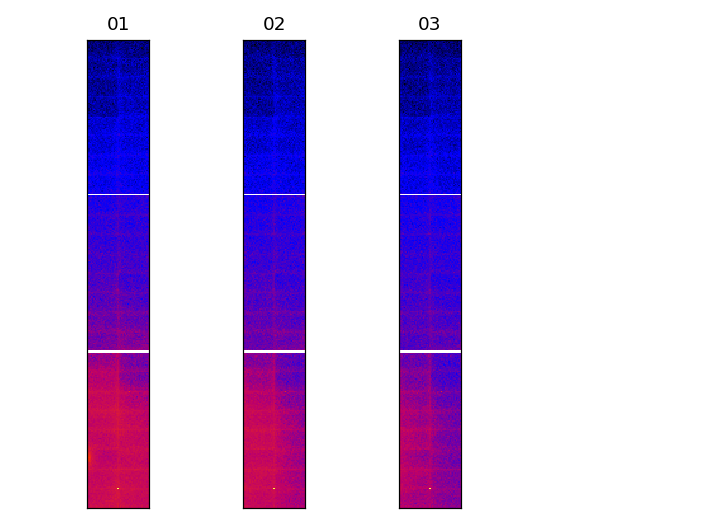

In [178]:
fig = plt.figure()# figsize=[2,8]) 
for i in range(len(infiles)):
    #print(i)
    ax = fig.add_subplot(1, len(infiles)+1, i+1)
    #d = process.load(  infiles[i]  )
    
    d = np.array(  PIL.Image.open(infiles[i]).convert('I') )
    #vmin=  max(1, d.mean() - d.std()*sca), vmax= d.mean() + d.std()*sca,
    sca= 1
    show_img( (d).T, logs = True, show_colorbar= False,show_ticks =False,
             ax= [fig, ax], image_name= '%02d'%(i+1), cmap = cmap_vge_hdr, 
             vmin= 20, vmax= 5e4,              
            aspect=1, save=False, path=ResDir)
fig.savefig(ResDir + k+'raw_image.png')

# Find the scaling factor for stitiching
* define the smoothing parameter (w, p)  in a savgol_filter algorithm

In [179]:
w= 801

if w>=101:
    p = 5
else:
    p=3
    
print(w,p)    
    

801 5


<IPython.core.display.Javascript object>


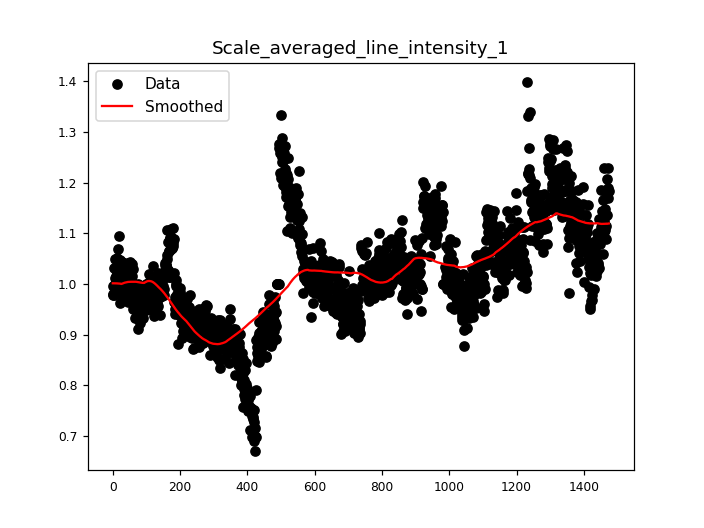

In [180]:


data, dataM, scale,scale_smooth = Correct_Overlap_Images_Intensities( infiles, window_length=w, polyorder=p, 
                                       overlap_width=58, badpixel_width = 10  )
check_overlap_scaling_factor( scale,scale_smooth, i=1, filename = ResDir + k + 'smoothed_one_line_1.png', save= False )


# Stitching data here

In [181]:
angxs, angxe, angzs, angze = [abs(np.degrees( np.arctan2 ( beam_x * 172/1e6, sam_det ) ) - start_angle),
np.degrees( np.arctan2 (data.shape[1] * 172/1e6, sam_det ) ) +  abs(np.degrees( np.arctan2 ( beam_x * 172/1e6, sam_det ) ) -start_angle),
np.degrees( np.arctan2 ( (beam_y-data.shape[0]) * 172/1e6, sam_det ) ), 
np.degrees( np.arctan2 ( ( beam_y ) * 172/1e6, sam_det ) )] 

ytick = np.round( np.linspace(angzs, angze, 9 ), 0 )
xtick = np.round( np.linspace(angxs, angxe, 8 ), 0 )
axs =  np.linspace(angxs, angxe, data.shape[1] )
azs =  np.linspace(angzs, angze, data.shape[0] )

In [182]:
print( angxs, angxe, angzs, angze )

1.0281726008 17.3765999363 -5.67923603851 39.4577340262


# Stitching data in angle space

<IPython.core.display.Javascript object>


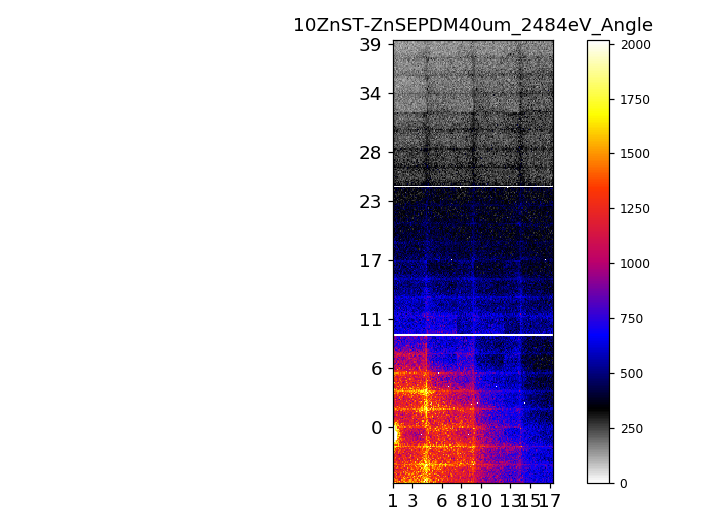

In [183]:
sca = 4
fig,ax=plt.subplots()
show_img(data, logs = False,  ax=[fig,ax],  vmin=  max(0, data.mean() -data.std()*sca), vmax= data.mean() + data.std()*sca,
         cmap = cmap_vge_hdr,  extent=[angxs, angxe, angzs, angze], aspect=1,  
         image_name = k+ 'Angle', dpi=500, save=False, path=ResDir)
ax.set_yticks( ytick )
ax.set_xticks( xtick )

fig.savefig( ResDir +  k+ 'Angle.png' )

# Stitching data in q-space

/opt/conda_envs/pySMI/lib/python3.6/site-packages/pySMI-0+untagged.1.g9127172-py3.6.egg/pySMI/Stitching.py:216: RuntimeWarning: invalid value encountered in true_divide
  Intensity_map = np.nan_to_num( Intensity_map/count_map )


<IPython.core.display.Javascript object>


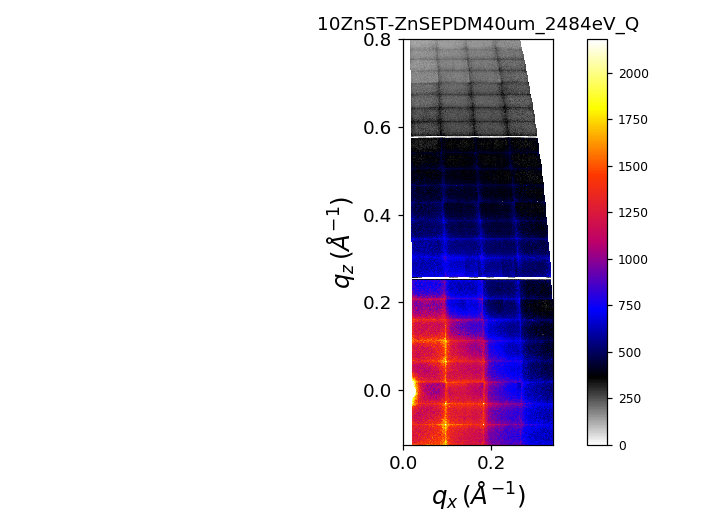

In [184]:
qdata, xs, zs = stitch_WAXS_in_Qspace( dataM, phis, calibration,  dx= 0, dy = 22, dz = 0,  dq= dq )

sca = 4
show_img(qdata, logs = False,   vmin=  max(0,qdata.mean() -qdata.std()*sca), vmax= qdata.mean() + qdata.std()*sca,
         extent=[xs[0], xs[-1], zs[0],zs[-1]], xlabel='$q_x \, (\AA^{-1})$',  ylabel='$q_z \, (\AA^{-1})$', 
         cmap = cmap_vge_hdr,   aspect=1,  image_name = k + 'Q', dpi=500, save=True, path=ResDir)

# Show the stitched image with a ring

<IPython.core.display.Javascript object>


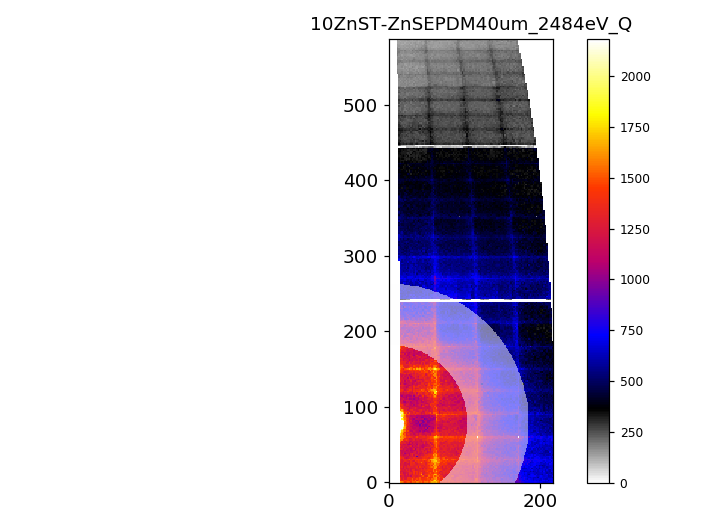

In [185]:
bx,by = np.argmin( np.abs(xs) ), np.argmin( np.abs(zs) )

ring_mask = create_ring_mask( qdata.shape, 103, 184, [bx,by]  )

show_img(qdata, label_array=ring_mask, logs = False, 
         vmin=  max(0,qdata.mean() -qdata.std()*sca), vmax= qdata.mean() + qdata.std()*sca,          
         cmap = cmap_vge_hdr,   aspect=1,  image_name = k + 'Q')


# Save data

In [186]:
xx, zz = np.meshgrid( axs, azs)            
m = np.round( np.vstack( [xx.ravel(), zz.ravel(), data.ravel()] ).T, 5) 
np.savetxt( ResDir  + k + 'Angle_data.txt',   m,fmt='%.5e', ) 
#np.save(  ResDir  + k + 'Angle_data', data )

In [187]:
xx, zz = np.meshgrid( xs, zs)            
m = np.round( np.vstack( [xx.ravel(), zz.ravel(), qdata.ravel()] ).T, 5) 
np.savetxt( ResDir  + k + 'Q_data.txt',   m,fmt='%.5e', ) 
#np.save(  ResDir  + k + 'Angle_data', data )